# PyTorch: Aprendiendo Fashion-MNIST

## Refs.

* https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

* https://github.com/zalandoresearch/fashion-mnist

* https://github.com/pranay414/Fashion-MNIST-Pytorch/blob/master/fashion_mnist.ipynb

## **Ejercicio 1)** Importando librerías

**0)** De ser necesario, **instale PyTorch** escribiendo

    !pip3 install torch torchvision torchaudio torchviz

**1)** Importe las librerías estandard de Python: `os`, `datetime`, `collections` y `pickle`.

**2)** Importe las siguientes librerías third party de Python: `matplotlib.pyplot`, `numpy`, `scipy`, `sklearn`, `pandas`, `dill` y `json`.

**3)** Importe las librerias necesarias de **PyTorch**: `torch` y `torchvision`.

**4)** Importe la librería: `google.colab`.

In [1]:
# 1.0)
!pip3 install torch torchvision torchaudio torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=e094f856424820bbbc996662b6e41387d34ec0439e9e0d4e80410e8291237c82
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [2]:
# 1.1)
import os
import pickle
import datetime
from collections import defaultdict

In [3]:
# 1.2)
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import sklearn as skl
import pandas as pd
#import dill
import json

In [4]:
# 1.3)
import torch
import torch.optim as optim
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, Subset, random_split
from torchvision import datasets
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms import ToTensor, Lambda, Compose
#from torchviz import make_dot

In [5]:
# 1.4)
import google.colab
from google.colab import files

## **Ejercicio 2)**

Bajando y Jugando con el dataset **Fashion-MNIST**.

**1)** Baje y transforme (i.e. normalize los valores al rango [0,1]) los conjuntos de entrenamiento y testeo de FashionMNIST.

**2)** Explore algunos ejemplos de estos conjuntos. Que formato poseen?

**3)** Visitando la página web de FashionMNIST, cree un diccionario de Python `Dict()` asociando cada categoría a un nombre adecuado de la misma.

**4)** Grafique un mosaico de 3x3 imagenes de FashionMNIST, cada una titulada con su respectiva clasificación

In [6]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convertir las imágenes a tensores
])                          # Esto ya normaliza los valores entre 0 y 1


train_dataset = datasets.FashionMNIST(
    root="./data",       # Directorio donde se almacenará el dataset
    train=True,
    download=True,
    transform=transform  # Aplicar transformaciones
)

test_dataset = datasets.FashionMNIST(
    root="./data",
    train=False,         # False para descargar el conjunto de prueba
    download=True,
    transform=transform
)

100%|██████████| 26.4M/26.4M [00:03<00:00, 8.33MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 134kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 2.45MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 3.79MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



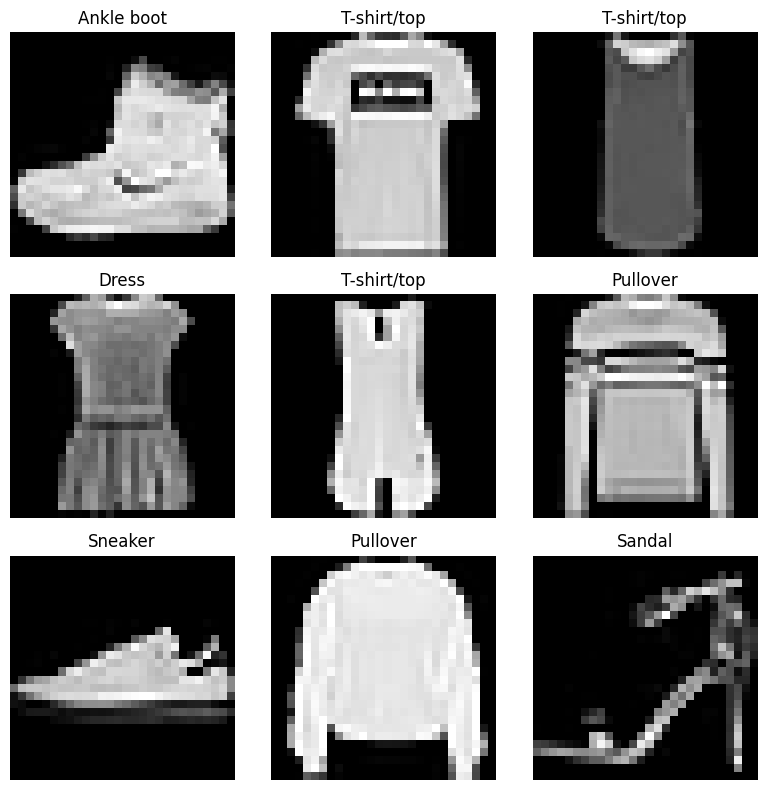

In [7]:
fashion_mnist_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}


fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flatten()):
    image, label = train_dataset[i]
    image = image.squeeze()  # Eliminar la dimensión extra (El canal de grises)
    ax.imshow(image, cmap="gray")
    ax.set_title(fashion_mnist_labels[label])
    ax.axis("off")

plt.tight_layout()
plt.show()

## Ejercicio 3)

Creando un `DataLoader` para alimentar el modelo con batchs (lotes) de entrenamiento.

**1)** Cree los `DataLoader`s para cada conjunto. Defínalos con un `batch_size` de 100 y con el flag `shuffle` seteado a `True`.

**2)** Use uno de los `DataLoader`s creados anteriormente para explorar algunos elementos del conjunto.

Notar que, el iterador devuelve el batch en un par `(image,label)`.

El objeto `images` es un tensor de dimensiones `(100,1,28,28)`.
El 100 es el tamaño del batch.
El 1 porque hay un solo canal (en este caso, un canal de escala de grises, pero podría haber varios, p. ej. uno por cada color de {Red, Green Blue} en caso que fuesen imagenes a color).
Luego, 28 y 28 porque cada imagen del dataset es de 28 x 28 píxeles.

El objeto `labels` es un tensor de dimensiones `(100,)`.
La $i$-ésima entrada `labels[i]` de `labels` es un número en $\{0,1,...,9\}$ indicando la categoría a la que pertenece la $i$-ésima imagen en el batch, guardada en `images[i]`.

In [8]:
train_set, valid_set = random_split(train_dataset, [50000, 10000])  # Dividir en train y validación

train_loader = DataLoader(dataset=train_set, batch_size=100, shuffle=True)
valid_loader = DataLoader(dataset=valid_set, batch_size=100, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=True)

# Verificar que se haya cargado correctamente
for images, labels in train_loader:
    print(f"Lote de imágenes: {images.size()}, Lote de etiquetas: {labels.size()}")
    break

Lote de imágenes: torch.Size([100, 1, 28, 28]), Lote de etiquetas: torch.Size([100])


## Ejercicio 4)

Defina una red neuronal de 4 capas, una de entrada, dos ocultas de $n_1=128$ y $n_2=64$ neuronas, respectivamente, y una de salida de 10 neuronas.

En las capas intermedias utilice neuronas tipo ReLU y agregueles un *dropout* de p=0.2.
En la capa de salida no utilice funciones de activación ni dropout.

Las capas sucesivas tienen que estar totalmente conectadas entre si.

In [9]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNet, self).__init__()

        # Definir las capas de la red
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),  # Capa de entrada a la primera capa oculta
            nn.ReLU(),                  # Activación ReLU
            nn.Dropout(p=0.2),          # Dropout con probabilidad 0.2
            nn.Linear(128, 64),         # Primera capa oculta a la segunda
            nn.ReLU(),                  # Activación ReLU
            nn.Dropout(p=0.2),          # Dropout con probabilidad 0.2
            nn.Linear(64, output_size)  # Segunda capa oculta a la salida
            # Sin función de activación ni dropout en la capa de salida
        )

    def forward(self, x):
        return self.model(x)


input_size = 28 * 28
output_size = 10

model = NeuralNet(input_size, output_size)

## Ejercicio 5)

Entrenamos el modelo

**1)** Implemente, en una función, un loop de entrenamiento que recorra los batchs (lotes).

**2)** Implemente, en una función, un loop de validación que recorra los batchs.

**3)** Inicialize dos `DataLoader`s llamados `train_loader` y `valid_loader` a partir del `train_set` (conjunto de entranmiento) y del `valid_set` (conjunto de validación) de Fashion-MNIST, respectivamente, y que usen batchs de 100 ejemplos.

**4)** Cree una función de pérdida usando la **Cross Entropy Loss**.

**IMPORTANTE:** Notar que la **Cross Entropy Loss** aplica automáticamente una `log_softmax`.

**5)** Cree un optimizador que utilice el método de **Stochastic Gradient Descent** con un learning rate igual a $10^{-3}$.

**6)** Cree una instancia del modelo.

**7)** Especifique en que dispositivo (`device`) va a trabajar: en una **CPU** o en una **GPU**.

**8)** Implemente un loop de entrenamiento y validación que trabaje con el `train_loader` y el `valid_loader`, respectivamente, usando un numero arbitrario de épocas.
Este loop debe guardar en cuatro listas los valores de los promedios del **Cross Entropy Loss** y las fracciones de clasificaciones correctas o **precisión** (accuracy) sobre el conjunto de **entrenamiento** y el de **validación**, respectivamente.

**IMPORTANTE:** No olvide copiar los batchs al dispositivo de trabajo.

**9)** Entrene y valide el modelo.

**10)** Use las listas del inciso anterior para graficar en función de las épocas la **Cross Entropy Loss** de **entrenamiento** y de **validación**.
Realize un gráfico análogo pero con la **precisión**.
Discuta y comente, cual es el número óptimo de épocas de entrenamiento?

**11)** Repita los experimentos variando hiperparámetros. Por ejemplo:

- El learning-rate.
- El optimizador (ej. puede usar ADAM).
- El valor de dropout.
- El número de neuronas en las capas intermedias.
- El número de épocas de entrenamiento.
- El tamaño de los lotes.

Discuta los resultados.

In [10]:
def train_error(model, train_loader, criterion, device):
  model.eval()  # Poner la red en modo de evaluación
  total_loss = 0
  correct = 0

  with torch.no_grad():  # Desactivar el cálculo de gradientes
      for batch_idx, (data, target) in enumerate(train_loader):
          data, target = data.to(device), target.to(device)
          data = data.view(data.size(0), -1)

          output = model(data)  # Paso hacia adelante
          loss = criterion(output, target)  # Calcular la pérdida

          total_loss += loss.item()
          pred = output.argmax(dim=1, keepdim=True)  # Obtener predicciones
          correct += pred.eq(target.view_as(pred)).sum().item()

  avg_loss = total_loss / len(train_loader)
  accuracy = 100. * correct / len(train_loader.dataset)

  return avg_loss, accuracy


def train_loop(model, train_loader, criterion, optimizer, device):
    model.train()  # Poner la red en modo de entrenamiento

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        data = data.view(data.size(0), -1)  # Aplanar las imágenes (28x28 -> 784)

        optimizer.zero_grad()  # Limpiar gradientes previos
        output = model(data)  # Paso hacia adelante
        loss = criterion(output, target)  # Calcular la pérdida
        loss.backward()  # Paso hacia atrás
        optimizer.step()  # Actualizar los parámetros

    avg_loss, accuracy = train_error(model, train_loader, criterion, device)
    return avg_loss, accuracy


In [11]:
def valid_loop(model, valid_loader, criterion, device):
    model.eval()  # Poner la red en modo de evaluación
    total_loss = 0
    correct = 0

    with torch.no_grad():  # Desactivar el cálculo de gradientes
        for batch_idx, (data, target) in enumerate(valid_loader):
            data, target = data.to(device), target.to(device)
            data = data.view(data.size(0), -1)

            output = model(data)  # Paso hacia adelante
            loss = criterion(output, target)  # Calcular la pérdida

            total_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)  # Obtener predicciones
            correct += pred.eq(target.view_as(pred)).sum().item()

    avg_loss = total_loss / len(valid_loader)
    accuracy = 100. * correct / len(valid_loader.dataset)

    return avg_loss, accuracy


In [12]:
# Definir la función de pérdida
criterion = nn.CrossEntropyLoss()

In [13]:
learning_rate = 1e-3
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Modelo trabajando en: {device}")

Modelo trabajando en: cpu


In [14]:
num_epochs = 50
train_losses, train_accuracies = [], []
valid_losses, valid_accuracies = [], []

for epoch in range(1, num_epochs + 1):
    print(f"\nÉpoca {epoch}/{num_epochs}")

    # Entrenamiento
    train_loss, train_accuracy = train_loop(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validación
    valid_loss, valid_accuracy = valid_loop(model, valid_loader, criterion, device)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_accuracy)

    print(f"Resumen - Época {epoch}:")
    print(f"  Pérdida de entrenamiento: {train_loss:.4f}")
    print(f"  Pérdida de validación: {valid_loss:.4f}, Precisión de validación: {valid_accuracy:.2f}%")

print("\nEntrenamiento finalizado.")


Época 1/50
Resumen - Época 1:
  Pérdida de entrenamiento: 2.2709
  Pérdida de validación: 2.2692, Precisión de validación: 14.46%

Época 2/50
Resumen - Época 2:
  Pérdida de entrenamiento: 2.2264
  Pérdida de validación: 2.2251, Precisión de validación: 18.44%

Época 3/50
Resumen - Época 3:
  Pérdida de entrenamiento: 2.1619
  Pérdida de validación: 2.1614, Precisión de validación: 35.00%

Época 4/50
Resumen - Época 4:
  Pérdida de entrenamiento: 2.0679
  Pérdida de validación: 2.0688, Precisión de validación: 42.67%

Época 5/50
Resumen - Época 5:
  Pérdida de entrenamiento: 1.9348
  Pérdida de validación: 1.9379, Precisión de validación: 38.43%

Época 6/50
Resumen - Época 6:
  Pérdida de entrenamiento: 1.7731
  Pérdida de validación: 1.7786, Precisión de validación: 45.03%

Época 7/50
Resumen - Época 7:
  Pérdida de entrenamiento: 1.6148
  Pérdida de validación: 1.6220, Precisión de validación: 47.32%

Época 8/50
Resumen - Época 8:
  Pérdida de entrenamiento: 1.4817
  Pérdida de vali

In [15]:
# Variables para rastrear las predicciones correctas y el total de ejemplos
correct = 0
total = 0

# Evaluar el modelo
with torch.no_grad():  # Desactiva el cálculo de gradientes
    for images, labels in test_loader:
        # Enviar los datos al dispositivo (CPU o GPU)
        images, labels = images.to('cpu'), labels.to('cpu')  # Cambia a 'cpu' si no usas GPU
        images = images.view(images.size(0), -1)
        # Pasar las imágenes a través del modelo
        outputs = model(images)

        # Obtener las predicciones (la clase con mayor probabilidad)
        _, predicted = torch.max(outputs, 1)

        # Comparar predicciones con etiquetas reales
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

# Calcular el accuracy
accuracy = correct / total
accuracy

0.7634

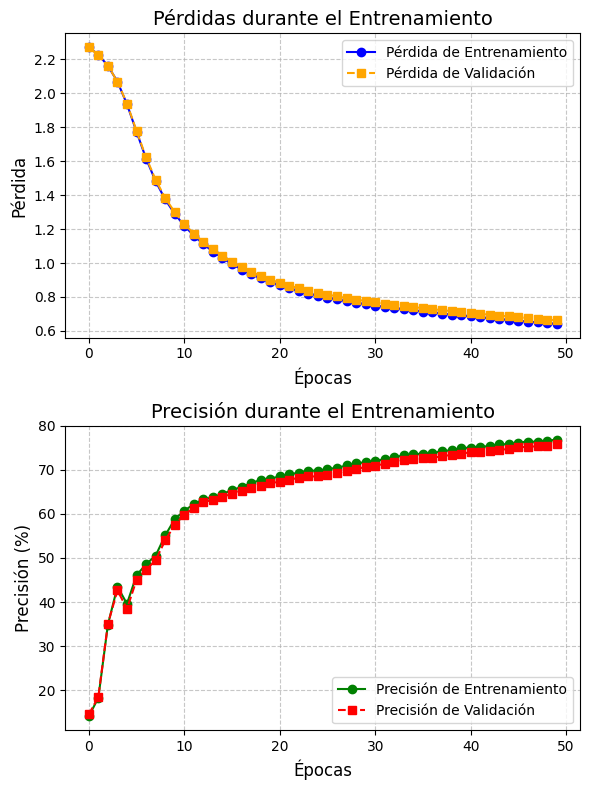

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8))

# Gráfico de pérdidas (Train vs Validation)
ax[0].plot(train_losses, label='Pérdida de Entrenamiento', color='blue', linestyle='-', marker='o')
ax[0].plot(valid_losses, label='Pérdida de Validación', color='orange', linestyle='--', marker='s')
ax[0].set_title('Pérdidas durante el Entrenamiento', fontsize=14)
ax[0].set_xlabel('Épocas', fontsize=12)
ax[0].set_ylabel('Pérdida', fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True, linestyle='--', alpha=0.7)

# Gráfico de precisiones (Train vs Validation)
ax[1].plot(train_accuracies, label='Precisión de Entrenamiento', color='green', linestyle='-', marker='o')
ax[1].plot(valid_accuracies, label='Precisión de Validación', color='red', linestyle='--', marker='s')

ax[1].set_title('Precisión durante el Entrenamiento', fontsize=14)
ax[1].set_xlabel('Épocas', fontsize=12)
ax[1].set_ylabel('Precisión (%)', fontsize=12)
ax[1].legend(fontsize=10)
ax[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In [17]:
params = [[1e-2, optim.SGD, 0.2, 256, 128, 50, 100], #
          [1e-3, optim.SGD, 0.2, 128, 128, 50, 200],
          [1e-3, optim.SGD, 0.5, 256, 256, 50, 100],
          [1e-2, optim.SGD, 0.5, 256, 128, 50, 500],
          [1e-2, optim.Adam, 0.5, 256, 256, 50, 100],
          [1e-3, optim.Adam, 0.5, 256, 64, 50, 200],#
          [1e-3, optim.Adam, 0.3, 128, 64, 50, 100],#
          [1e-2, optim.Adam, 0.3, 512, 128, 50, 500]]#

results = []
accuracys = []

for p in params:

  train_set, valid_set = random_split(train_dataset, [50000, 10000])  # Dividir en train y validación

  train_loader = DataLoader(dataset=train_set, batch_size=p[6], shuffle=True)
  valid_loader = DataLoader(dataset=valid_set, batch_size=p[6], shuffle=True)
  test_loader = DataLoader(dataset=test_dataset, batch_size=p[6], shuffle=True)

  # Definición de la red neuronal
  class NeuralNet(nn.Module):
      def __init__(self, input_size, output_size):
          super(NeuralNet, self).__init__()

          # Definir las capas de la red
          self.model = nn.Sequential(
              nn.Linear(input_size, p[3]),  # Capa de entrada a la primera capa oculta
              nn.ReLU(),                  # Activación ReLU
              nn.Dropout(p=p[2]),          # Dropout con probabilidad 0.2
              nn.Linear(p[3], p[4]),         # Primera capa oculta a la segunda
              nn.ReLU(),                  # Activación ReLU
              nn.Dropout(p=p[2]),          # Dropout con probabilidad 0.2
              nn.Linear(p[4], output_size)  # Segunda capa oculta a la salida
              # Sin función de activación ni dropout en la capa de salida
          )

      def forward(self, x):
          return self.model(x)

  # Inicializar la red con un tamaño de entrada y salida adecuados
  input_size = 28 * 28  # Tamaño de las imágenes de FashionMNIST (28x28 píxeles)
  output_size = 10      # Número de clases (10 categorías de FashionMNIST)

  model = NeuralNet(input_size, output_size)

  # Especificar el dispositivo de trabajo
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.to(device)

  learning_rate = p[0]
  optimizer = p[1](model.parameters(), lr=learning_rate)

  # Implementar el bucle de entrenamiento y validación
  num_epochs = p[5]
  train_losses, train_accuracies = [], []
  valid_losses, valid_accuracies = [], []

  for epoch in range(1, num_epochs + 1):
      print(f"\nÉpoca {epoch}/{num_epochs}")

      # Entrenamiento
      train_loss, train_accuracy = train_loop(model, train_loader, criterion, optimizer, device)
      train_losses.append(train_loss)
      train_accuracies.append(train_accuracy)

      # Validación
      valid_loss, valid_accuracy = valid_loop(model, valid_loader, criterion, device)
      valid_losses.append(valid_loss)
      valid_accuracies.append(valid_accuracy)

      print(f"Resumen - Época {epoch}:")
      print(f"  Pérdida de entrenamiento: {train_loss:.4f}")
      print(f"  Pérdida de validación: {valid_loss:.4f}, Precisión de validación: {valid_accuracy:.2f}%")
  results.append([train_losses, train_accuracies, valid_losses, valid_accuracies])

  model.eval()

  # Variables para rastrear las predicciones correctas y el total de ejemplos
  correct = 0
  total = 0

  # Evaluar el modelo
  with torch.no_grad():  # Desactiva el cálculo de gradientes
      for images, labels in test_loader:
          # Enviar los datos al dispositivo (CPU o GPU)
          images, labels = images.to('cpu'), labels.to('cpu')  # Cambia a 'cpu' si no usas GPU
          images = images.view(images.size(0), -1)
          # Pasar las imágenes a través del modelo
          outputs = model(images)

          # Obtener las predicciones (la clase con mayor probabilidad)
          _, predicted = torch.max(outputs, 1)

          # Comparar predicciones con etiquetas reales
          correct += (predicted == labels).sum().item()
          total += labels.size(0)

  # Calcular el accuracy
  accuracy = correct / total
  accuracys.append(accuracy)
print("\nEntrenamiento finalizado.")


Época 1/50
Resumen - Época 1:
  Pérdida de entrenamiento: 1.2102
  Pérdida de validación: 1.2113, Precisión de validación: 62.22%

Época 2/50
Resumen - Época 2:
  Pérdida de entrenamiento: 0.8348
  Pérdida de validación: 0.8412, Precisión de validación: 68.03%

Época 3/50
Resumen - Época 3:
  Pérdida de entrenamiento: 0.7291
  Pérdida de validación: 0.7342, Precisión de validación: 73.03%

Época 4/50
Resumen - Época 4:
  Pérdida de entrenamiento: 0.6640
  Pérdida de validación: 0.6713, Precisión de validación: 75.77%

Época 5/50
Resumen - Época 5:
  Pérdida de entrenamiento: 0.6155
  Pérdida de validación: 0.6230, Precisión de validación: 78.01%

Época 6/50
Resumen - Época 6:
  Pérdida de entrenamiento: 0.5780
  Pérdida de validación: 0.5871, Precisión de validación: 79.90%

Época 7/50
Resumen - Época 7:
  Pérdida de entrenamiento: 0.5498
  Pérdida de validación: 0.5597, Precisión de validación: 80.68%

Época 8/50
Resumen - Época 8:
  Pérdida de entrenamiento: 0.5268
  Pérdida de vali

In [18]:
#Obtener los índices ordenados por el último valor de la última lista en orden descendente
sorted_indices = sorted(
    range(len(accuracys)),
    key=lambda i: accuracys[i],
    reverse=True
)

top_4_indices = sorted_indices[:4]

print("Índices de las 4 listas con el test accuracy más alto:", top_4_indices)

Índices de las 4 listas con el test accuracy más alto: [5, 6, 7, 0]


In [24]:
performance1 = results[5]
performance2 = results[6]
performance3 = results[7]
performance4 = results[0]

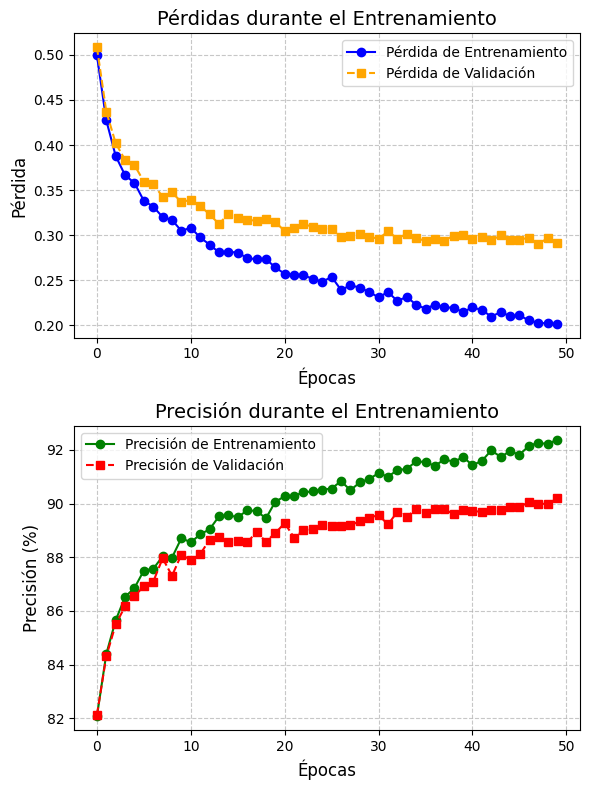

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8))

# Gráfico de pérdidas (Train vs Validation)
ax[0].plot(performance1[0], label='Pérdida de Entrenamiento', color='blue', linestyle='-', marker='o')
ax[0].plot(performance1[2], label='Pérdida de Validación', color='orange', linestyle='--', marker='s')
ax[0].set_title('Pérdidas durante el Entrenamiento', fontsize=14)
ax[0].set_xlabel('Épocas', fontsize=12)
ax[0].set_ylabel('Pérdida', fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True, linestyle='--', alpha=0.7)

# Gráfico de precisiones (Train vs Validation)
ax[1].plot(performance1[1], label='Precisión de Entrenamiento', color='green', linestyle='-', marker='o')
ax[1].plot(performance1[3], label='Precisión de Validación', color='red', linestyle='--', marker='s')

ax[1].set_title('Precisión durante el Entrenamiento', fontsize=14)
ax[1].set_xlabel('Épocas', fontsize=12)
ax[1].set_ylabel('Precisión (%)', fontsize=12)
ax[1].legend(fontsize=10)
ax[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

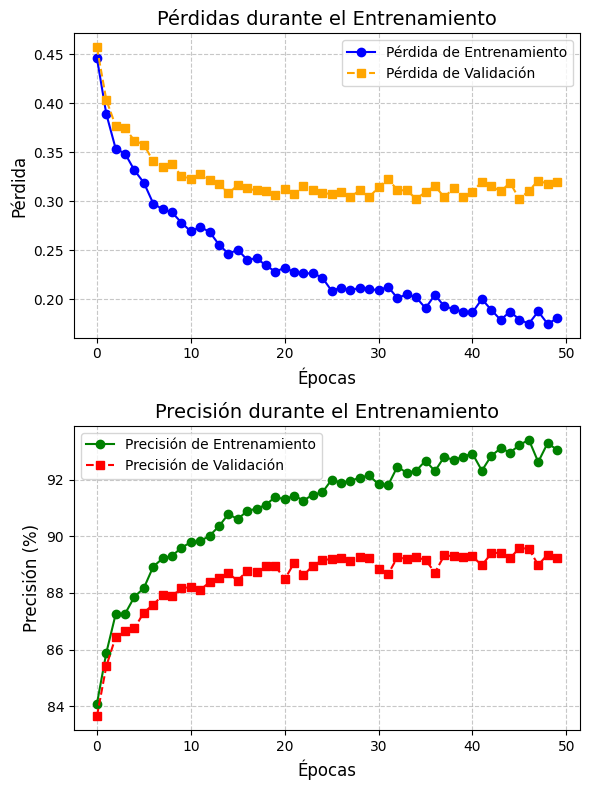

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8))

# Gráfico de pérdidas (Train vs Validation)
ax[0].plot(performance2[0], label='Pérdida de Entrenamiento', color='blue', linestyle='-', marker='o')
ax[0].plot(performance2[2], label='Pérdida de Validación', color='orange', linestyle='--', marker='s')
ax[0].set_title('Pérdidas durante el Entrenamiento', fontsize=14)
ax[0].set_xlabel('Épocas', fontsize=12)
ax[0].set_ylabel('Pérdida', fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True, linestyle='--', alpha=0.7)

# Gráfico de precisiones (Train vs Validation)
ax[1].plot(performance2[1], label='Precisión de Entrenamiento', color='green', linestyle='-', marker='o')
ax[1].plot(performance2[3], label='Precisión de Validación', color='red', linestyle='--', marker='s')

ax[1].set_title('Precisión durante el Entrenamiento', fontsize=14)
ax[1].set_xlabel('Épocas', fontsize=12)
ax[1].set_ylabel('Precisión (%)', fontsize=12)
ax[1].legend(fontsize=10)
ax[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

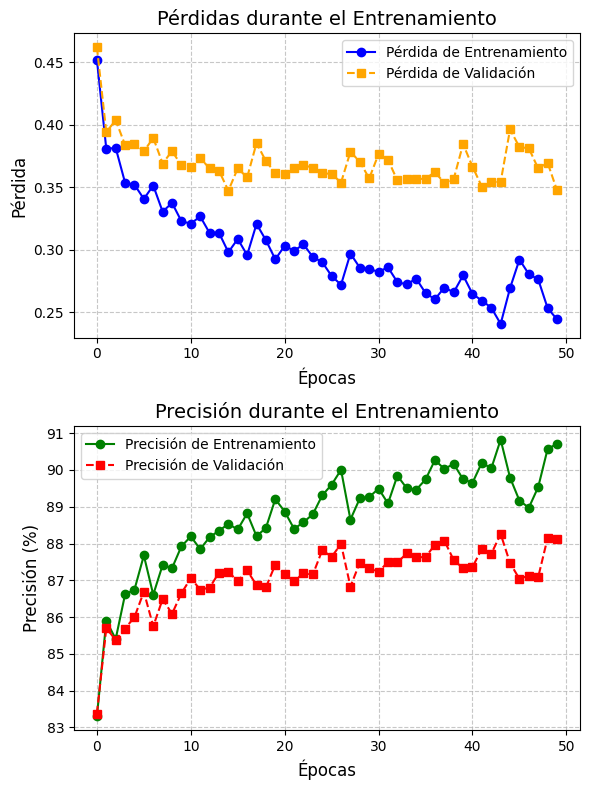

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8))

# Gráfico de pérdidas (Train vs Validation)
ax[0].plot(performance3[0], label='Pérdida de Entrenamiento', color='blue', linestyle='-', marker='o')
ax[0].plot(performance3[2], label='Pérdida de Validación', color='orange', linestyle='--', marker='s')
ax[0].set_title('Pérdidas durante el Entrenamiento', fontsize=14)
ax[0].set_xlabel('Épocas', fontsize=12)
ax[0].set_ylabel('Pérdida', fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True, linestyle='--', alpha=0.7)

# Gráfico de precisiones (Train vs Validation)
ax[1].plot(performance3[1], label='Precisión de Entrenamiento', color='green', linestyle='-', marker='o')
ax[1].plot(performance3[3], label='Precisión de Validación', color='red', linestyle='--', marker='s')

ax[1].set_title('Precisión durante el Entrenamiento', fontsize=14)
ax[1].set_xlabel('Épocas', fontsize=12)
ax[1].set_ylabel('Precisión (%)', fontsize=12)
ax[1].legend(fontsize=10)
ax[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

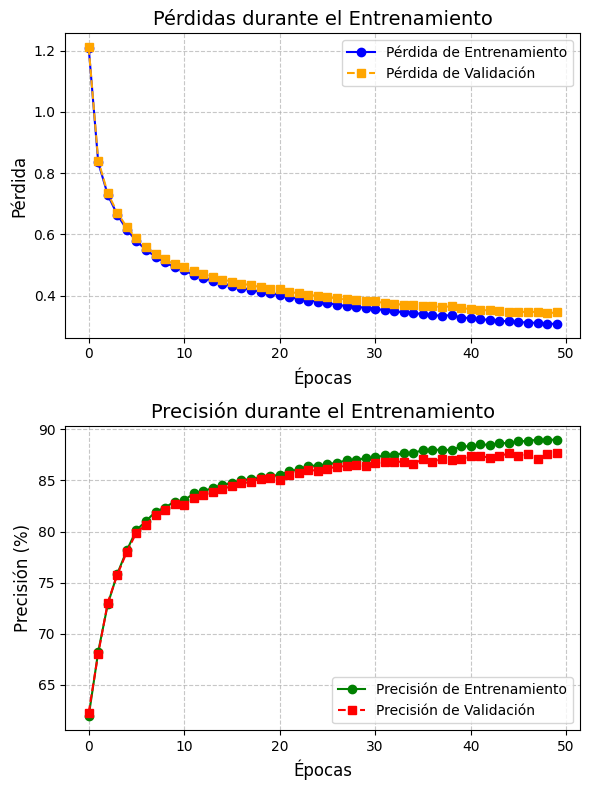

In [29]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8))

# Gráfico de pérdidas (Train vs Validation)
ax[0].plot(performance4[0], label='Pérdida de Entrenamiento', color='blue', linestyle='-', marker='o')
ax[0].plot(performance4[2], label='Pérdida de Validación', color='orange', linestyle='--', marker='s')
ax[0].set_title('Pérdidas durante el Entrenamiento', fontsize=14)
ax[0].set_xlabel('Épocas', fontsize=12)
ax[0].set_ylabel('Pérdida', fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True, linestyle='--', alpha=0.7)

# Gráfico de precisiones (Train vs Validation)
ax[1].plot(performance4[1], label='Precisión de Entrenamiento', color='green', linestyle='-', marker='o')
ax[1].plot(performance4[3], label='Precisión de Validación', color='red', linestyle='--', marker='s')

ax[1].set_title('Precisión durante el Entrenamiento', fontsize=14)
ax[1].set_xlabel('Épocas', fontsize=12)
ax[1].set_ylabel('Precisión (%)', fontsize=12)
ax[1].legend(fontsize=10)
ax[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In [30]:
print(accuracys[5])
print(accuracys[6])
print(accuracys[7])
print(accuracys[0])

0.8888
0.882
0.875
0.8697


In [ ]:
params = [[1e-2, optim.SGD, 0.2, 256, 128, 50, 100], #
          [1e-3, optim.SGD, 0.2, 128, 128, 50, 200],
          [1e-3, optim.SGD, 0.5, 256, 256, 50, 100],
          [1e-2, optim.SGD, 0.5, 256, 128, 50, 500],
          [1e-2, optim.Adam, 0.5, 256, 256, 50, 100],
          [1e-3, optim.Adam, 0.5, 256, 64, 50, 200],#
          [1e-3, optim.Adam, 0.3, 128, 64, 50, 100],#
          [1e-2, optim.Adam, 0.3, 512, 128, 50, 500]]#